# Menyanthes Example with three groundwater extractions
Menyanthes is a timeseries analysis program used by a lot of people in the Netherlands. In this example a Menyanthes-file with one observation-series is imported, and simulated. There are several stresses in the Menyanthes-file, among which are three groundwater extractions with a significant influence on groundwater head.


In [1]:
# First perform the necessary imports
import matplotlib.pyplot as plt
import pastas as ps
%matplotlib notebook

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1. Importing the Menyanthes-file
Import the Menyanthes-file with observations and stresses. Then plot the observations, together with the diferent stresses in the Menyanthes file.

<IPython.core.display.Javascript object>


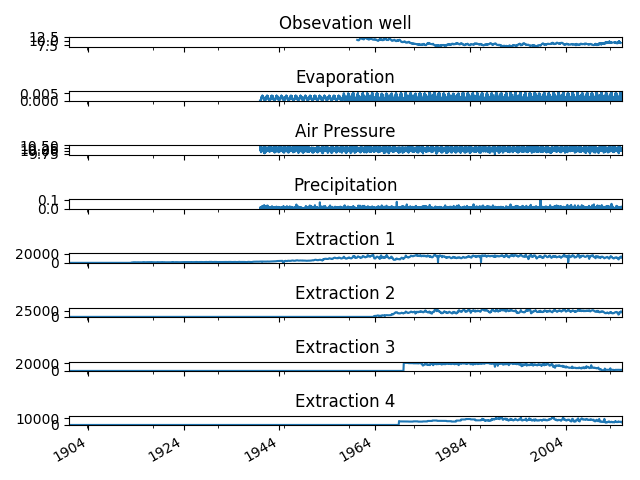

In [2]:
# how to use it?
fname = '../data/MenyanthesTest.men'
meny = ps.read.menydata(fname)

# plot some series
f1, axarr = plt.subplots(len(meny.IN)+1, sharex=True)
oseries = meny.H['Obsevation well']["values"]
oseries.plot(ax=axarr[0])
axarr[0].set_title(meny.H['Obsevation well']["Name"])
for i, val in enumerate(meny.IN.items()):
    name, data = val
    data["values"].plot(ax=axarr[i+1])
    axarr[i+1].set_title(name)
plt.tight_layout()
plt.show()

## 2. Run a model
Make a model with precipitation, evaporation and three groundwater extractions.

In [3]:
# Create the time series model
ml = ps.Model(oseries)

# Add precipitation
IN = meny.IN['Precipitation']['values']
IN.index = IN.index.round("D")
IN2 = meny.IN['Evaporation']['values']
IN2.index = IN2.index.round("D")
ts = ps.StressModel2([IN, IN2], ps.Gamma, 'Recharge')
ml.add_tseries(ts)

# Add well extraction 1
IN = meny.IN['Extraction 1']
# extraction amount counts for the previous month
ts = ps.StressModel(IN['values'], ps.Hantush, 'Extraction_1', up=False,
                kind="well", settings=dict(freq="W"))
ml.add_tseries(ts)

# Add well extraction 2
IN = meny.IN['Extraction 2']
# extraction amount counts for the previous month
ts = ps.StressModel(IN['values'], ps.Hantush, 'Extraction_2', up=False,
                kind="well", settings=dict(freq="W"))
ml.add_tseries(ts)

# Add noise model
n = ps.NoiseModel()
ml.add_noisemodel(n)

# Solve
ml.solve();

2017-10-03 12:49:00,063 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:00,063 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:00,100 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:00,102 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:00,126 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:00,128 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:00,156 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-

c:\python\pastas\pastas\solver.py:94: UserWarning: Caution, solving the model with a noisemodel but not weighting the innovations, please consider applying weights.
  warn("Caution, solving the model with a noisemodel but not "


2017-10-03 12:49:00,308 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:00,311 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:00,339 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:00,342 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:00,372 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:00,375 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:00,405 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-

2017-10-03 12:49:01,193 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:01,223 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:01,225 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:01,250 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:01,254 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:01,289 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:01,291 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-

2017-10-03 12:49:02,177 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:02,182 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:02,219 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:02,220 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:02,254 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:02,255 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:02,289 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-

2017-10-03 12:49:03,122 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:03,126 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:03,159 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:03,164 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:03,197 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:03,203 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:03,237 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-

2017-10-03 12:49:04,109 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:04,140 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:04,141 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:04,175 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:04,176 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:04,207 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:04,208 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-

2017-10-03 12:49:05,175 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:05,178 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:05,210 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:05,211 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:05,248 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:05,250 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:05,286 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-

2017-10-03 12:49:06,246 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:06,278 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:06,279 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:06,312 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:06,314 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:06,356 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:06,357 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-

2017-10-03 12:49:07,305 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:07,307 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:07,343 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:07,345 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:07,377 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:07,381 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-04-28 12:00:00
2017-10-03 12:49:07,419 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1960-

## 3. Plot the decomposition
Show the decomposition of the groundwater head, by plotting the influence on groundwater head of each of the stresses.

<IPython.core.display.Javascript object>


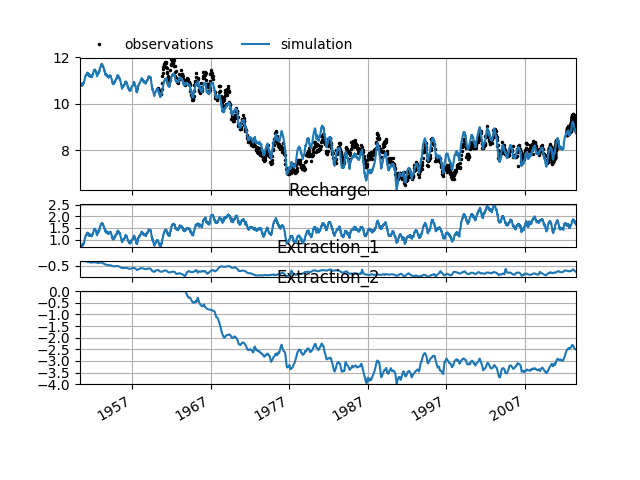

In [4]:
fig = ml.plots.decomposition()